# Detecting Sarcasm And Irony In The Text Using NLP Models

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Download NLTK data (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

True

## Loading Datasets

In [3]:
d1 = pd.read_json(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\DIS 1003\Dataset\Sarcasm_Headlines_Dataset.json", lines = True)
d2 = pd.read_json(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Inifinte Solutions\DIS 1003\Dataset\Sarcasm_Headlines_Dataset_v2.json", lines = True)

## Displaying the Data

In [4]:
d1

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [5]:
d2

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


### Merging two datasets into single

In [6]:
data = pd.concat([d1, d2], axis=0, ignore_index=True)

In [7]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
55323,https://www.theonion.com/jews-to-celebrate-ros...,jews to celebrate rosh hashasha or something,1
55324,https://local.theonion.com/internal-affairs-in...,internal affairs investigator disappointed con...,1
55325,https://www.huffingtonpost.com/entry/andrew-ah...,the most beautiful acceptance speech this week...,0
55326,https://www.theonion.com/mars-probe-destroyed-...,mars probe destroyed by orbiting spielberg-gat...,1


### Cleaning the data

In [8]:
df = pd.DataFrame(data)

# Find the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Drop duplicate rows, keeping the first occurrence
df.drop_duplicates(keep='first', inplace=True)

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 26711


### Renaming columns of Dataset

In [9]:
# Rename the columns
df.rename(columns={'headline': 'text', 'is_sarcastic': 'label'}, inplace=True)

# Print the DataFrame with renamed columns
df

,article_link,text,label
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
55206,https://www.theonion.com/tyson-holds-contest-t...,tyson holds contest to let fans submit new ide...,1
55218,https://politics.theonion.com/increasingly-coc...,increasingly cocky bernie sanders announces he...,1
55229,https://www.theonion.com/cash-strapped-zuckerb...,cash-strapped zuckerberg forced to sell 11 mil...,1
55253,https://local.theonion.com/grocery-store-bar-a...,grocery store bar actually has great little ha...,1


### Counting the labels

In [10]:
# Count the number of labels
label_counts = df['label'].value_counts()

print("Label counts:")
print(label_counts)

Label counts:
0    14984
1    13633
Name: label, dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28617 entries, 0 to 55298
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  28617 non-null  object
 1   text          28617 non-null  object
 2   label         28617 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


### Visualising the Data

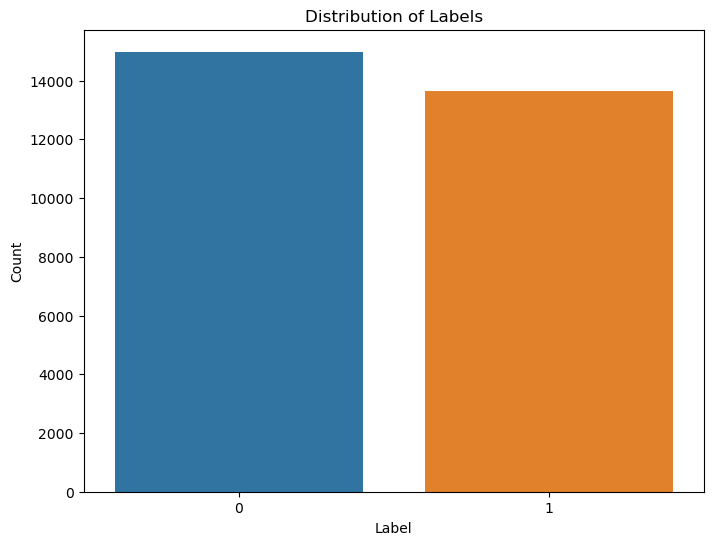

In [12]:
# Summary statistics for the "label" column
label_summary = df['label'].describe()

# Countplot to visualize the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

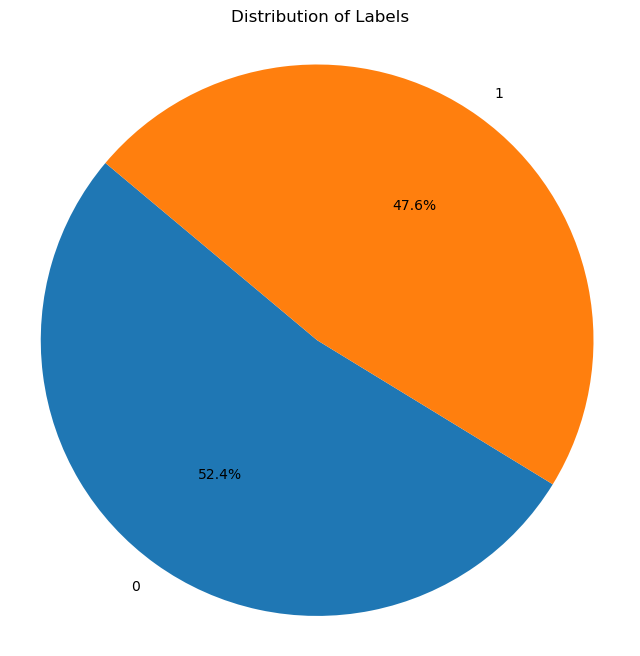

In [13]:
# Count the frequency of each label
label_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

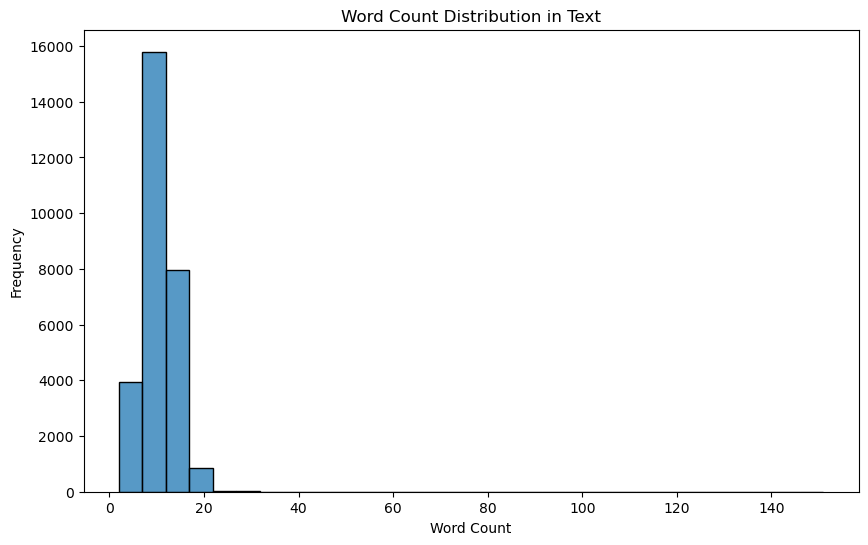

In [14]:
# Word count distribution for the "headline" column (assuming text data)
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Histogram to visualize the word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_word_count', bins=30)
plt.title('Word Count Distribution in Text')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Correlation between word count and label (if applicable)
correlation = df['label'].corr(df['text_word_count'])

# Print summary statistics and correlation
print("Summary statistics for 'label' column:")
print(label_summary)
print("\nCorrelation between 'label' and 'text_word_count':", correlation)

Summary statistics for 'label' column:
count    28617.000000
mean         0.476395
std          0.499451
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64

Correlation between 'label' and 'text_word_count': 0.07244869675090039


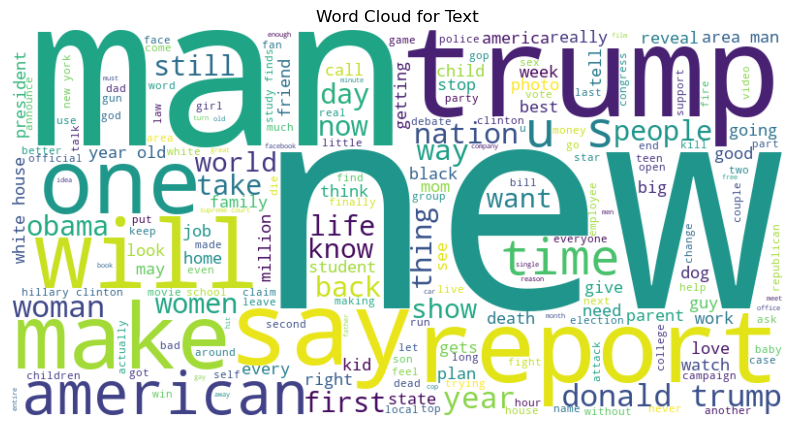

In [16]:
# Combine all headlines into a single string
all_headlines = " ".join(df['text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_headlines)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Text')
plt.axis('off')
plt.show()

# NLP

1. Tokenization and lowercase conversion: It tokenizes the text in each row, converting it to lowercase.
2. Removal of stopwords and punctuation: It removes stopwords (common words like "the," "is," etc.) and non-alphanumeric characters from the tokenized text.
3. Stemming: It applies stemming to the remaining words in the text (reducing words to their root form).
4. Conversion to string format: The processed text is converted back to a single string per row.
5. TF-IDF vectorization: It uses TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert the text data into a numerical format, creating a TF-IDF matrix.
6. Optional DataFrame conversion: The TF-IDF matrix is converted to a Pandas DataFrame for further analysis or visualization.

In [17]:
# Tokenization and lowercase conversion
df['text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])

# Stemming (you can use lemmatization if preferred)
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Convert the preprocessed text back to string format
df['text'] = df['text'].apply(lambda x: ' '.join(x))

# TF-IDF vectorization (feature extraction)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Convert TF-IDF matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF DataFrame (if needed)
tfidf_df

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names_out'

# Train and Test

In [18]:
X = tfidf_df  # Features (TF-IDF matrix)
y = df['label']  # Labels

# Split the data into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets (optional)
print("Train set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Test set - Features:", X_test.shape, "Labels:", y_test.shape)

Train set - Features: (22893, 1000) Labels: (22893,)
Test set - Features: (5724, 1000) Labels: (5724,)


# Machine Learning Models 

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76      2990
           1       0.74      0.69      0.71      2734

    accuracy                           0.74      5724
   macro avg       0.74      0.73      0.73      5724
weighted avg       0.74      0.74      0.73      5724



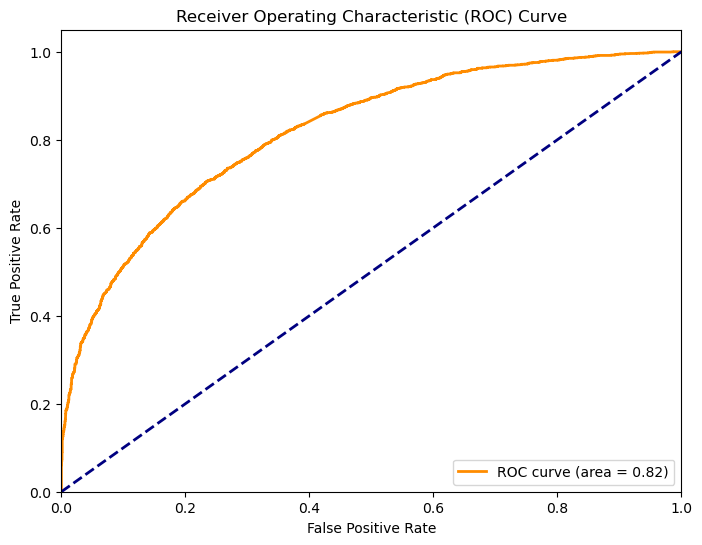

In [19]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = logistic_regression.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Plot the ROC curve
y_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.73      0.78      0.76      2990
           1       0.74      0.68      0.71      2734

    accuracy                           0.74      5724
   macro avg       0.74      0.73      0.73      5724
weighted avg       0.74      0.74      0.74      5724



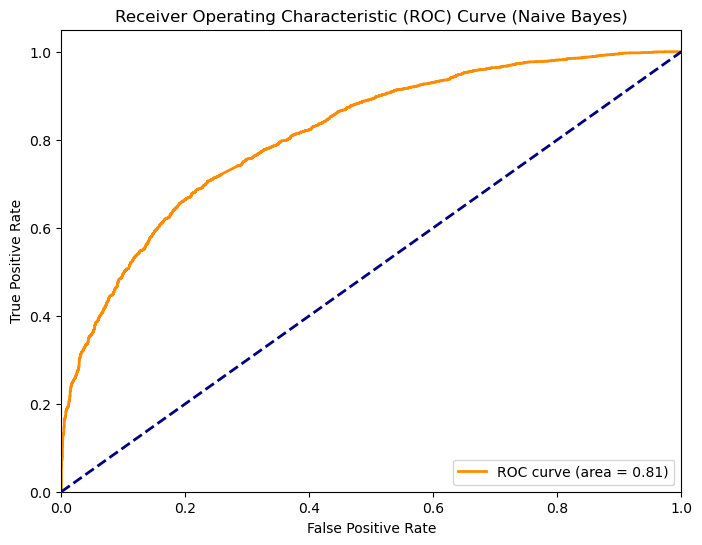

In [20]:
# Create a Multinomial Naive Bayes model
naive_bayes = MultinomialNB()

# Fit the model on the training data
naive_bayes.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = naive_bayes.predict(X_test)

# Print the classification report
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))

# Plot the ROC curve
y_prob_nb = naive_bayes.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.69      0.67      0.68      2990
           1       0.65      0.66      0.66      2734

    accuracy                           0.67      5724
   macro avg       0.67      0.67      0.67      5724
weighted avg       0.67      0.67      0.67      5724



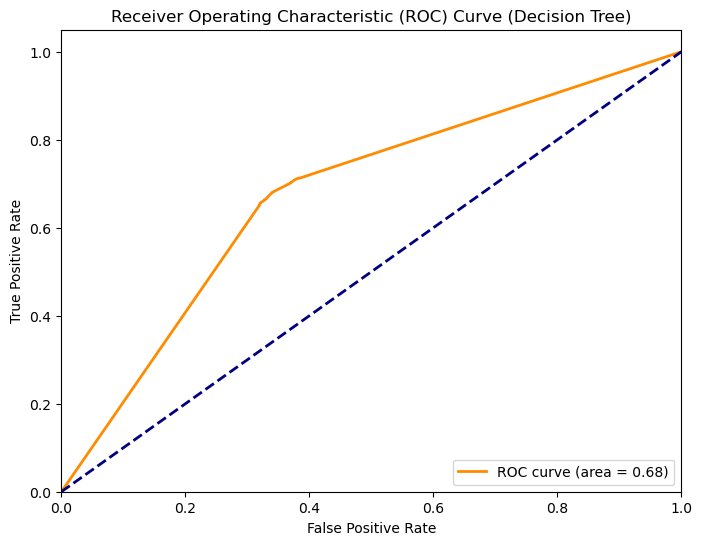

In [21]:
# Create a Decision Tree Classifier model
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = decision_tree.predict(X_test)

# Print the classification report
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Plot the ROC curve
y_prob_dt = decision_tree.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()

# Hyper Parameter Tunning

In [22]:
X = np.array(df['text'])
y = np.array(df['label'])

In [23]:
cv = CountVectorizer()
X = cv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [24]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()

In [25]:
y_pred = bnb.predict(X_test)

In [26]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      2990
           1       0.81      0.74      0.77      2734

    accuracy                           0.79      5724
   macro avg       0.79      0.79      0.79      5724
weighted avg       0.79      0.79      0.79      5724



1. A grid of hyperparameters is defined, including different values for the regularization parameter 'C' and the type of penalty ('l1' for L1 regularization, 'l2' for L2 regularization).
2. A GridSearchCV object is created, which will search for the best hyperparameters through 5-fold cross-validation, using the F1-score as the evaluation metric.
3. The GridSearchCV object is fitted to the training data (X_train and y_train) to find the best hyperparameters.
4. The best hyperparameters are printed.
5. The best model with the tuned hyperparameters is extracted, and predictions are made on the test data (X_test).
6. The classification report is printed, showing various classification metrics like precision, recall, and F1-score for the tuned Logistic Regression model.

In [27]:
# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l1', 'l2'],         # Penalty (L1 or L2 regularization)
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,           # Number of cross-validation folds
    scoring='f1',   # Scoring metric (F1-score in this case)
    verbose=2       # Verbosity level (higher for more details)
)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_logistic_regression = grid_search.best_estimator_
y_pred_tuned = best_logistic_regression.predict(X_test)

# Print the classification report
print("Classification Report (Tuned Logistic Regression):\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.2s
[CV] END ................................C=0.001, penalty=l2; total time=   0.4s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

1. A grid of hyperparameters is defined, with different values for the smoothing parameter 'alpha'.
2. A GridSearchCV object is created, which will search for the best 'alpha' value through 5-fold cross-validation, using the F1-score as the evaluation metric.
3. The GridSearchCV object is fitted to the training data (X_train and y_train) to find the best 'alpha' value.
4. The best 'alpha' value is printed.
5. The best model with the tuned 'alpha' value is extracted, and predictions are made on the test data (X_test).
6. The classification report is printed, showing various classification metrics like precision, recall, and F1-score for the tuned Multinomial Naive Bayes classifier.

In [28]:
# Define a grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Smoothing parameter (alpha)
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv=5,           # Number of cross-validation folds
    scoring='f1',   # Scoring metric (F1-score in this case)
    verbose=2       # Verbosity level (higher for more details)
)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_naive_bayes = grid_search.best_estimator_
y_pred_tuned = best_naive_bayes.predict(X_test)

# Print the classification report
print("Classification Report (Tuned Naive Bayes):\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=0.5; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ........................................

1. A random parameter grid is defined, specifying hyperparameters to search for the Decision Tree model. It includes the criterion for splitting ('gini' or 'entropy'), random integer values for 'max_depth,' 'min_samples_split,' and 'min_samples_leaf.'
2. A RandomizedSearchCV object is created to search for the best combination of hyperparameters. It will try 100 random combinations using 5-fold cross-validation and use the F1-score as the evaluation metric. It utilizes all available CPU cores for parallel processing.
3. The RandomizedSearchCV object is fitted to the training data (X_train and y_train) to find the best hyperparameter combination.
4. The best hyperparameters are printed.
5. The best model with the tuned hyperparameters is extracted, and predictions are made on the test data (X_test).
6. The classification report is printed, showing various classification metrics like precision, recall, and F1-score for the tuned Decision Tree classifier.

In [29]:
# Define a random parameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 40),  # Random integer values for max_depth
    'min_samples_split': randint(2, 11),  # Random integer values for min_samples_split
    'min_samples_leaf': randint(1, 5),  # Random integer values for min_samples_leaf
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,   # Number of random combinations to try
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_decision_tree = random_search.best_estimator_
y_pred_tuned = best_decision_tree.predict(X_test)

# Print the classification report
print("Classification Report (Tuned Decision Tree):\n", classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 38, 'min_samples_leaf': 3, 'min_samples_split': 3}
Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.62      0.91      0.73      2990
           1       0.79      0.39      0.52      2734

    accuracy                           0.66      5724
   macro avg       0.70      0.65      0.63      5724
weighted avg       0.70      0.66      0.63      5724



1. It creates a list of model names, including "Logistic Regression," "Naive Bayes," and "Decision Tree," and a list of their corresponding fitted models.

2. It initializes empty lists to store classification reports and ROC data.

3. It loops through the models, making predictions on the test data, generating classification reports, and calculating ROC data (Receiver Operating Characteristic) for each model.

4. The classification reports are extracted and appended to the "classification_reports" list. These reports include metrics like precision, recall, F1-score, and support for each class and a weighted average.

5. For each model, it calculates the False Positive Rate (FPR), True Positive Rate (TPR), and the Area Under the Curve (AUC) for the ROC curve.

6. The classification reports and ROC data are stored in data structures.

7. A Pandas DataFrame is created from the classification reports.

8. The classification report table is printed, displaying the performance metrics for each model.

In [30]:
# Create a list of model names and their corresponding fitted models
model_names = ["Logistic Regression", "Naive Bayes", "Decision Tree"]
fitted_models = [best_logistic_regression, best_naive_bayes, best_decision_tree]

# Create empty lists to store classification reports and ROC data
classification_reports = []
roc_data = []

# Loop through the models
for model_name, model in zip(model_names, fitted_models):
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Generate the classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Append the classification report to the list
    classification_reports.append({"Model": model_name, **report["weighted avg"]})
    
    # Calculate ROC data
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Append ROC data
    roc_data.append({"Model": model_name, "FPR": fpr, "TPR": tpr, "AUC": roc_auc})

# Create a DataFrame from the classification reports
classification_report_df = pd.DataFrame(classification_reports)

# Display the classification report table
print("Classification Reports:")
print(classification_report_df)

Classification Reports:
                 Model  precision    recall  f1-score  support
0  Logistic Regression   0.792921  0.792453  0.791999     5724
1          Naive Bayes   0.788220  0.788260  0.788235     5724
2        Decision Tree   0.698534  0.656883  0.630538     5724


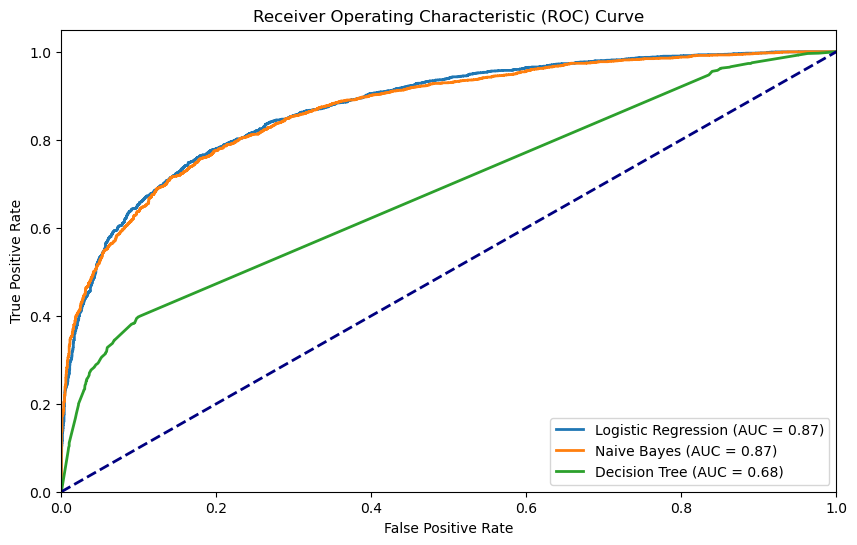

In [31]:
# Create a single plot for ROC curves
plt.figure(figsize=(10, 6))
for data in roc_data:
    plt.plot(data["FPR"], data["TPR"], lw=2, label=f'{data["Model"]} (AUC = {data["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')